## Question 3: Hierarchical Clustering

In [1]:
# imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np

In [4]:
# reading the data in pandas dataframe
football = pd.read_csv('./../../football_data.csv', index_col=0)

### Pre-processing

In [5]:
# Step 1: Extract numerical features
num_data = football.select_dtypes(include=[np.number])
# replacing missing values with mean value of that column
data = num_data.fillna(num_data.mean())
# removing ordinal feature 'ID'
data.drop('ID', axis=1, inplace=True)

In [6]:
data.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


### Part 1: Agglomerative Clustering
We use sklearn library which has implementation of agglomerative clustering algorithm.

In [7]:
# imports
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [8]:
X = data    # creating a copy of data for reuse

In [10]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Applying dimensionality reduction to the data using Principal Component Analysis
# comment following code if you don't want to use the PCA algorithm
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

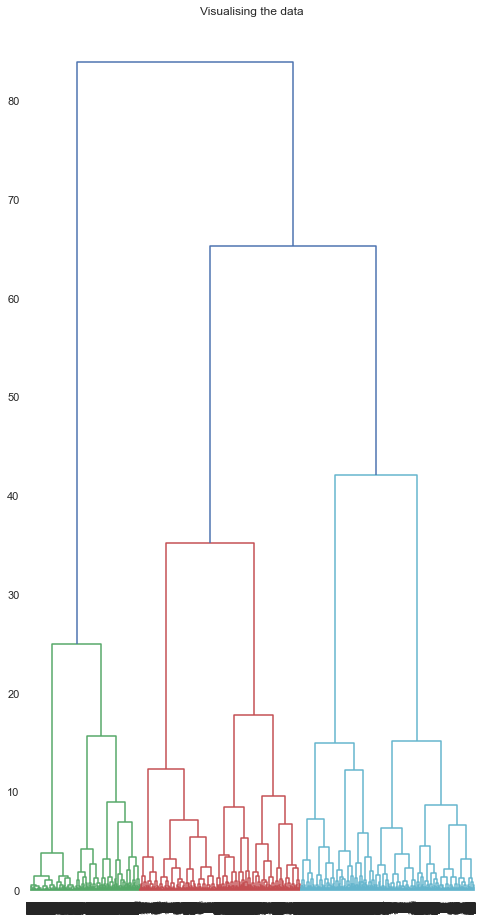

In [11]:
plt.figure(figsize =(8, 16))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

#### using the dendrogram above, we can infer that optimal number of clusters can be 2 or 4. Checking the cluster quality with both of these values


In [12]:
ac2 = AgglomerativeClustering(n_clusters = 2)
ac2_result = ac2.fit_predict(X_principal)

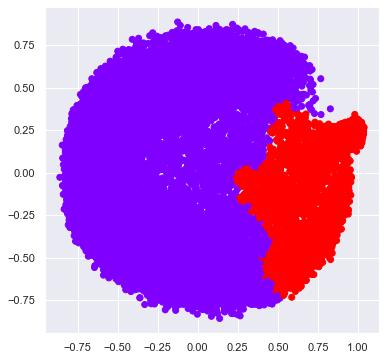

In [13]:
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac2_result, cmap ='rainbow')
plt.show()

In [14]:
ac4 = AgglomerativeClustering(n_clusters = 4)
ac4_result = ac4.fit_predict(X_principal)

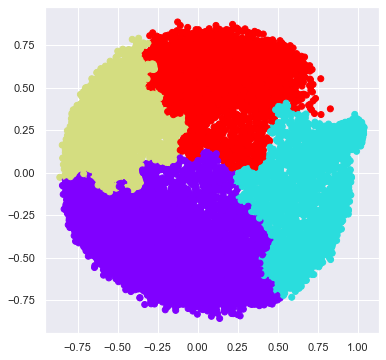

In [15]:
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

Comparing the cluster quality with k=2 and k=4

In [16]:
print("Silhoutee result for k=2: ", silhouette_score(X_principal, ac2_result))
print("Silhoutee result for k=4: ", silhouette_score(X_principal, ac4_result))


Silhoutee result for k=2:  0.39531409117256916
Silhoutee result for k=4:  0.3984029909939727


## Part 2: Divisive clustering